In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine
import graphviz 

# Decision Trees
## Breast Cancer Wisconsin (Diagnostic) Data Set
We are going to test how the tree does the splits, diffrent prunning values and max length of the tree. 
I was playing with the diffrent parameters by hand

In [34]:
wine = my_load_wine("..\\..\\..\\wine")
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

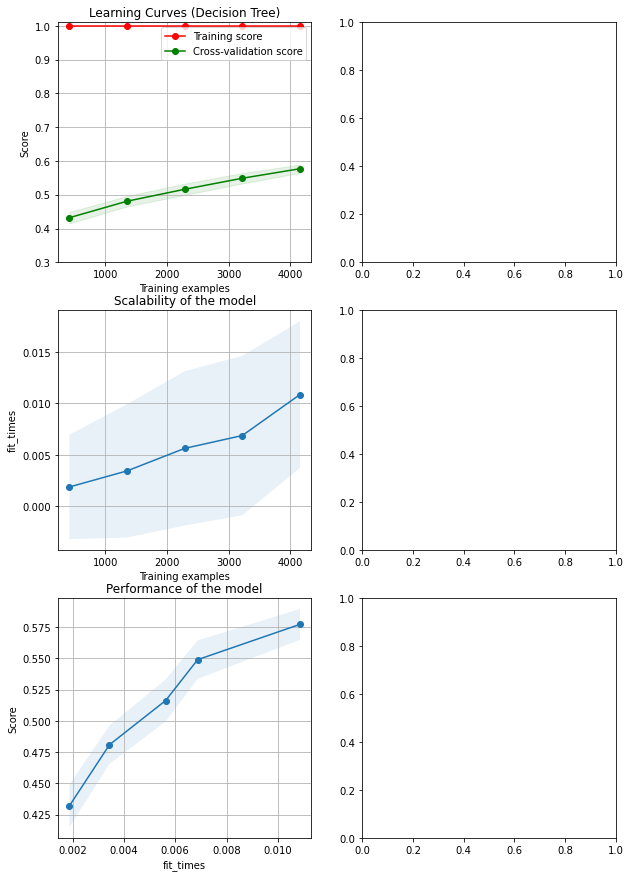

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
title = "Learning Curves (Decision Tree)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = tree.DecisionTreeClassifier(criterion="entropy", splitter="random", ccp_alpha=0.000, max_depth=None)
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.3, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

In [31]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print("Accuracy", score)

Accuracy 0.9649122807017544


In [9]:
dot_data = tree.export_graphviz(estimator, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [10]:
dot_data = tree.export_graphviz(estimator, out_file=None, 
feature_names=wine.feature_names,  
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 